<a href="https://colab.research.google.com/github/pav16an/PWSKILLS_FULLSTACK_DATA_SCIENCE_PRO/blob/main/spotify_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spotify Data Analysis
This notebook analyzes the Spotify dataset containing popular hip-hop artists and tracks.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/spotify.csv')

## 1. Distribution of popularity among tracks

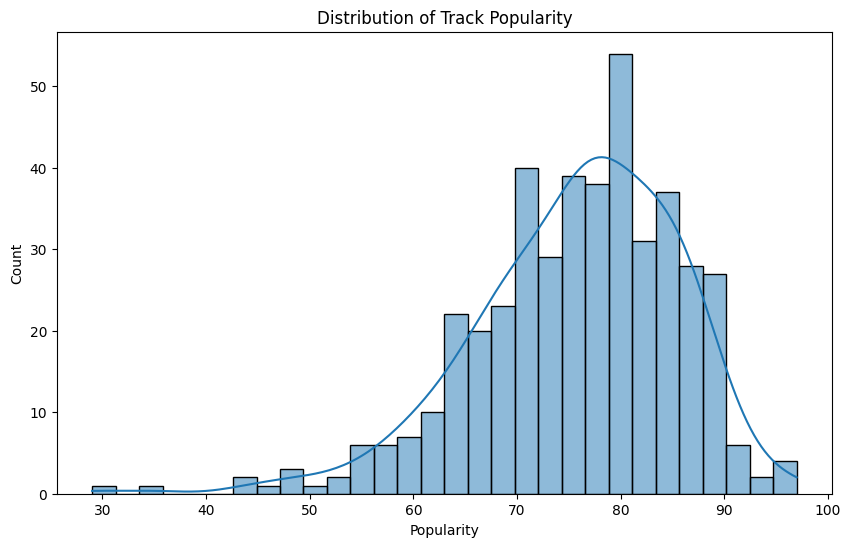

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Popularity'], bins=30, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

## 2. Relationship between popularity and duration

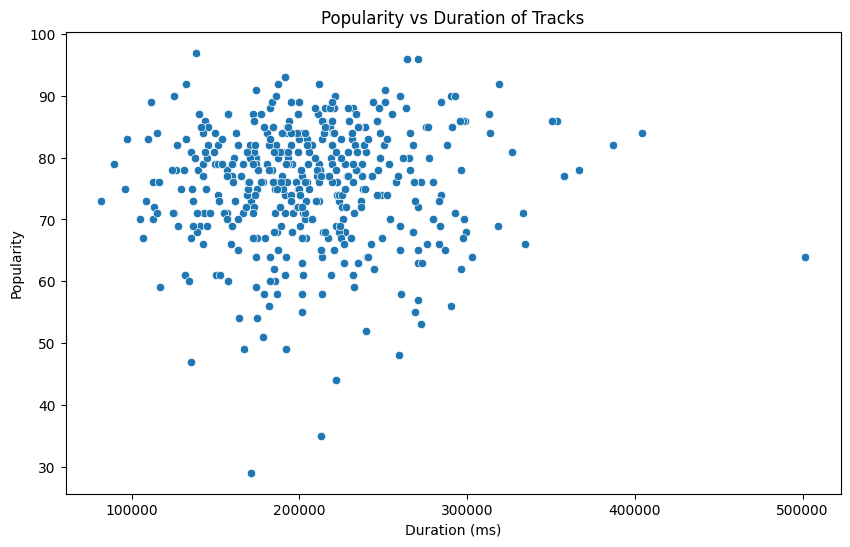

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=df)
plt.title('Popularity vs Duration of Tracks')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()

## 3. Artist with highest number of tracks

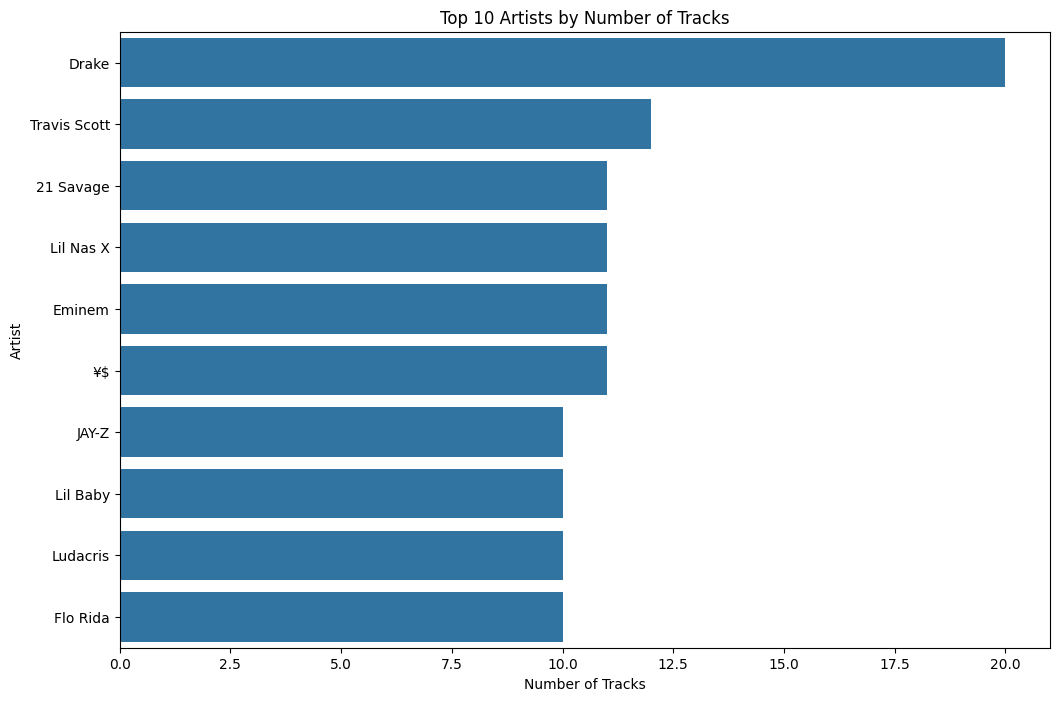

In [ ]:
plt.figure(figsize=(12,8))
top_artists = df['Artist'].value_counts().head(10)
sns.barplot(x=top_artists.values, y=top_artists.index)
plt.title('Top 10 Artists by Number of Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()

## 4. Top 5 least popular tracks

In [ ]:
least_popular = df.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
least_popular

,Artist,Track Name,Popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
413,French Montana,Splash Brothers,44
435,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47


## 5. Among top 5 most popular artists, artist with highest average popularity

In [ ]:
top5_artists = df['Artist'].value_counts().head(5).index
avg_popularity_top5 = df[df['Artist'].isin(top5_artists)].groupby('Artist')['Popularity'].mean().sort_values(ascending=False)
avg_popularity_top5

,Popularity
Artist,
Travis Scott,87.000000
21 Savage,84.181818
Eminem,83.636364
Drake,83.500000
Lil Nas X,76.090909


## 6. Most popular tracks of top 5 artists

In [ ]:
most_popular_tracks = df[df['Artist'].isin(top5_artists)].sort_values(['Artist', 'Popularity'], ascending=[True, False]).groupby('Artist').first()[['Track Name', 'Popularity']]
most_popular_tracks

,Track Name,Popularity
Artist,,
21 Savage,redrum,96
Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92
Eminem,Without Me,90
Lil Nas X,THATS WHAT I WANT,81
Travis Scott,FE!N (feat. Playboi Carti),93


## 7. Pair plot of numerical variables

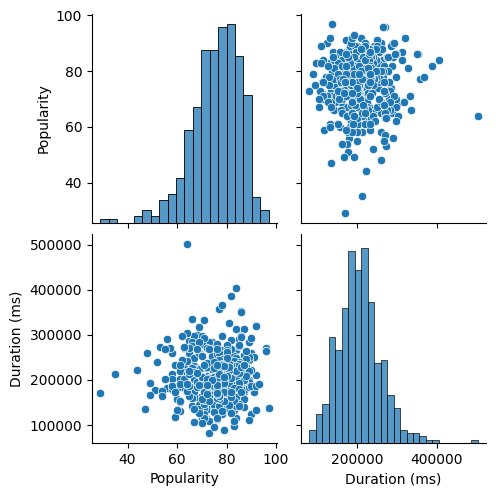

In [ ]:
sns.pairplot(df[['Popularity', 'Duration (ms)']])
plt.show()

## 8. Duration variation across artists (top 5 artists)

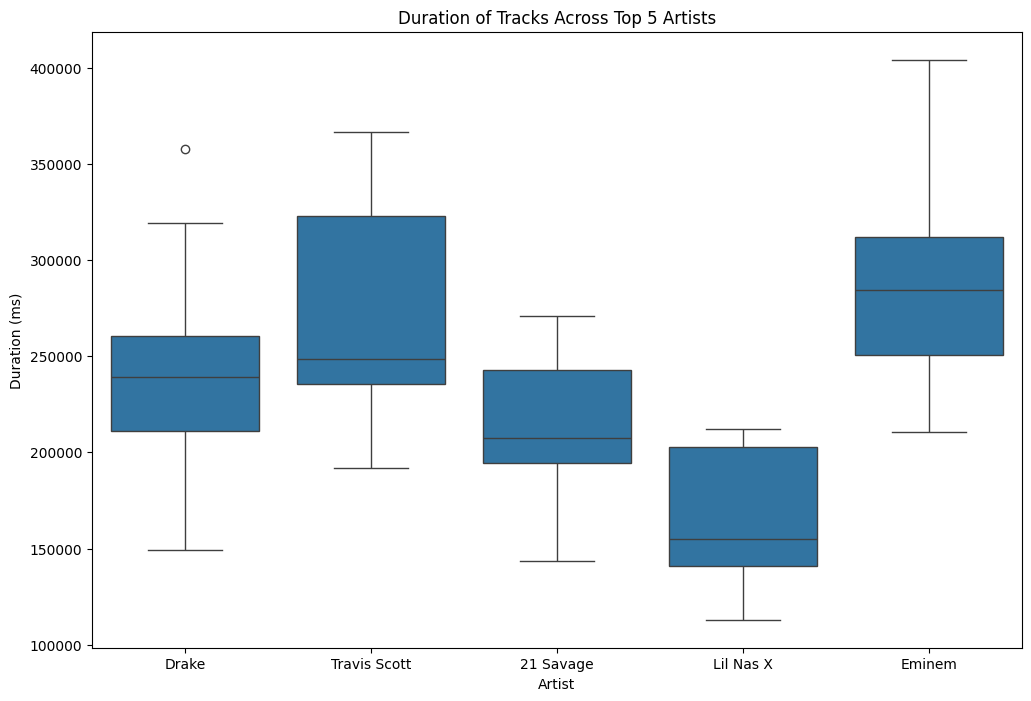

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Artist', y='Duration (ms)', data=df[df['Artist'].isin(top5_artists)])
plt.title('Duration of Tracks Across Top 5 Artists')
plt.show()

## 9. Distribution of track popularity for different artists (top 5 artists)

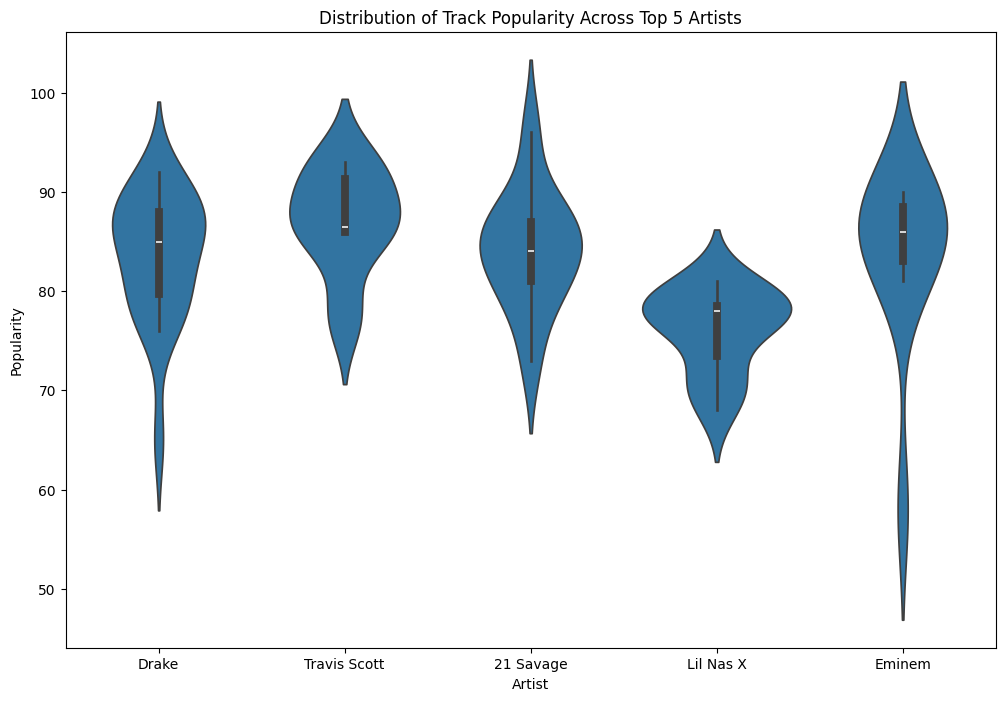

In [ ]:
plt.figure(figsize=(12,8))
sns.violinplot(x='Artist', y='Popularity', data=df[df['Artist'].isin(top5_artists)])
plt.title('Distribution of Track Popularity Across Top 5 Artists')
plt.show()